In [3]:
import pandas as pd

# Load the datasets
train_df = pd.read_csv('/kaggle/input/soil-flux/train_transformed_10.csv')
val_df = pd.read_csv('/kaggle/input/soil-flux/val_transformed_10.csv')
test_df = pd.read_csv('/kaggle/input/soil-flux/test_transformed_10.csv')

# Remove the 'DateTime.1' column
train_df = train_df.drop(columns=['DateTime.1'])
val_df = val_df.drop(columns=['DateTime.1'])
test_df = test_df.drop(columns=['DateTime.1'])

# Display the first few rows of the training dataset to verify
print(train_df.head())

              DateTime  SoilHeatFlux_DiffVolt1  VolSWC_10cm  \
0  2018-07-02 23:30:00                1.467500     0.203375   
1  2018-07-02 23:40:00                1.538333     0.203061   
2  2018-07-02 23:50:00                1.609167     0.202747   
3  2018-07-03 00:00:00                1.680000     0.202433   
4  2018-07-03 00:10:00                1.761222     0.202411   

   Conductivity_10cm  SoilTemp_10cm  VolSWC_20cm  Conductivity_20cm  \
0          59.325000      31.931250     0.249000          41.000000   
1          59.257778      31.831278     0.249000          40.982222   
2          59.190556      31.731306     0.249000          40.964444   
3          59.123333      31.631333     0.249000          40.946667   
4          59.031111      31.495444     0.249056          40.903333   

   SoilTemp_20cm  VolSWC_40cm  Conductivity_40cm  SoilTemp_40cm  VolSWC_80cm  \
0      32.968750     0.225000          24.012500      32.760000        0.185   
1      32.943722     0.225011     

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [7]:
# Load the data
df_train = pd.read_csv('/kaggle/input/soil-flux/train_transformed_10.csv')
df_val = pd.read_csv('/kaggle/input/soil-flux/val_transformed_10.csv')
df_test = pd.read_csv('/kaggle/input/soil-flux/test_transformed_10.csv')

# Convert 'DateTime' column to datetime type and set as index
df_train['DateTime'] = pd.to_datetime(df_train['DateTime'])
df_val['DateTime'] = pd.to_datetime(df_val['DateTime'])
df_test['DateTime'] = pd.to_datetime(df_test['DateTime'])

# Sort by DateTime to maintain time sequence
df_train.sort_values('DateTime', inplace=True)
df_val.sort_values('DateTime', inplace=True)
df_test.sort_values('DateTime', inplace=True)

# Set DateTime as index
df_train.set_index('DateTime', inplace=True)
df_val.set_index('DateTime', inplace=True)
df_test.set_index('DateTime', inplace=True)

# Select only the target variable (SoilHeatFlux_DiffVolt1) for prediction
train_values = df_train[['SoilHeatFlux_DiffVolt1']]
val_values = df_val[['SoilHeatFlux_DiffVolt1']]
test_values = df_test[['SoilHeatFlux_DiffVolt1']]

In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))

train_scaled = scaler.fit_transform(train_values)
val_scaled = scaler.transform(val_values)
test_scaled = scaler.transform(test_values)

In [10]:
def create_sequences(data, sequence_length=60):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 60  # Choose sequence length based on time steps

X_train, y_train = create_sequences(train_scaled, sequence_length)
X_val, y_val = create_sequences(val_scaled, sequence_length)
X_test, y_test = create_sequences(test_scaled, sequence_length)

In [12]:
from tensorflow.keras.layers import Input

# Define the model using Input as the first layer
model = Sequential([
    Input(shape=(sequence_length, 1)),  # Define input shape
    LSTM(64, return_sequences=True),
    LSTM(64, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

Training for 10 epochs
Epoch 1/10
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 0.0063 - val_loss: 2.6331e-04
Epoch 2/10
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 2.0769e-04 - val_loss: 8.8993e-05
Epoch 3/10
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 9.5095e-05 - val_loss: 6.7301e-05
Epoch 4/10
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 5.0607e-05 - val_loss: 2.3573e-05
Epoch 5/10
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 3.5334e-05 - val_loss: 1.9023e-05
Epoch 6/10
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 2.3100e-05 - val_loss: 1.2038e-05
Epoch 7/10
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 2.0405e-05 - val_loss: 9.7070e-06
Epoch 8/10
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 1.8624e-05 - val_loss: 1.6351e-05
Epoch 9/10
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 1.8989e-05 - val_loss: 9.3834e-06
Epoch 10/10
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 1.7954e-05 - val_loss: 1.2183e-05
224/224 ━━━━━━━━━━━

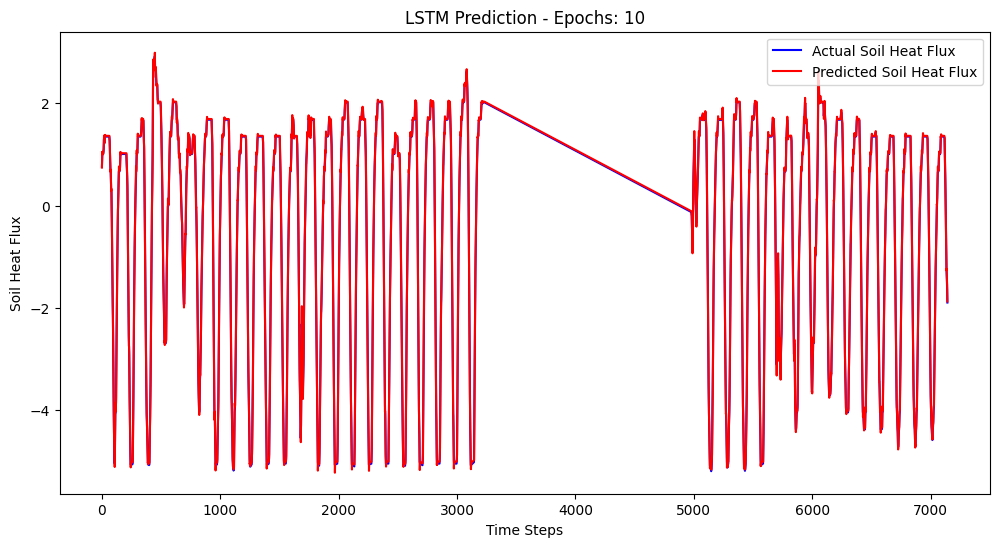

Training for 25 epochs
Epoch 1/25
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 1.7958e-05 - val_loss: 9.6487e-06
Epoch 2/25
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 1.8635e-05 - val_loss: 1.6729e-05
Epoch 3/25
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 1.8593e-05 - val_loss: 1.4648e-05
Epoch 4/25
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 1.5083e-05 - val_loss: 1.0979e-05
Epoch 5/25
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 1.6147e-05 - val_loss: 1.0334e-05
Epoch 6/25
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 1.6451e-05 - val_loss: 1.5724e-05
Epoch 7/25
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 1.2966e-05 - val_loss: 2.1932e-05
Epoch 8/25
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 1.3991e-05 - val_loss: 1.2039e-05
Epoch 9/25
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 1.5949e-05 - val_loss: 9.0118e-06
Epoch 10/25
1049/1049 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 1.2513e-05 - val_loss: 9.9477e-06
Epoch 11/25
1049

KeyboardInterrupt: 

In [13]:
epochs_list = [10, 25, 50, 75, 100]

for epochs in epochs_list:
    print(f"Training for {epochs} epochs")
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=32, verbose=1)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Inverse transform predictions and actual values
    y_pred_rescaled = scaler.inverse_transform(y_pred)
    y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_rescaled, label='Actual Soil Heat Flux', color='blue')
    plt.plot(y_pred_rescaled, label='Predicted Soil Heat Flux', color='red')
    plt.title(f'LSTM Prediction - Epochs: {epochs}')
    plt.xlabel('Time Steps')
    plt.ylabel('Soil Heat Flux')
    plt.legend()
    plt.show()

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


Training model for 10 epochs...

224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Results for 10 epochs:
MSE: 1.8068667322794056e-05
RMSE: 0.004250725505463045
MAE: 0.0032281519376777265
R^2: 99.96310683634343%


Training model for 25 epochs...

224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Results for 25 epochs:
MSE: 2.4596154621087082e-05
RMSE: 0.004959451040295396
MAE: 0.004269648903961496
R^2: 99.9497788109357%


Training model for 50 epochs...

224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Results for 50 epochs:
MSE: 1.0628059565511275e-05
RMSE: 0.0032600704847458857
MAE: 0.00167191613482881
R^2: 99.97829929933972%


Training model for 75 epochs...

224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Results for 75 epochs:
MSE: 1.7433238741706587e-05
RMSE: 0.004175313011225217
MAE: 0.0032938443883343983
R^2: 99.96440427406893%


Training model for 100 epochs...

224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Results for 100 epochs:
MSE: 1.0893296611532072e-05
RMSE: 0.0033004994488004496
MAE: 0.0016366131557247379


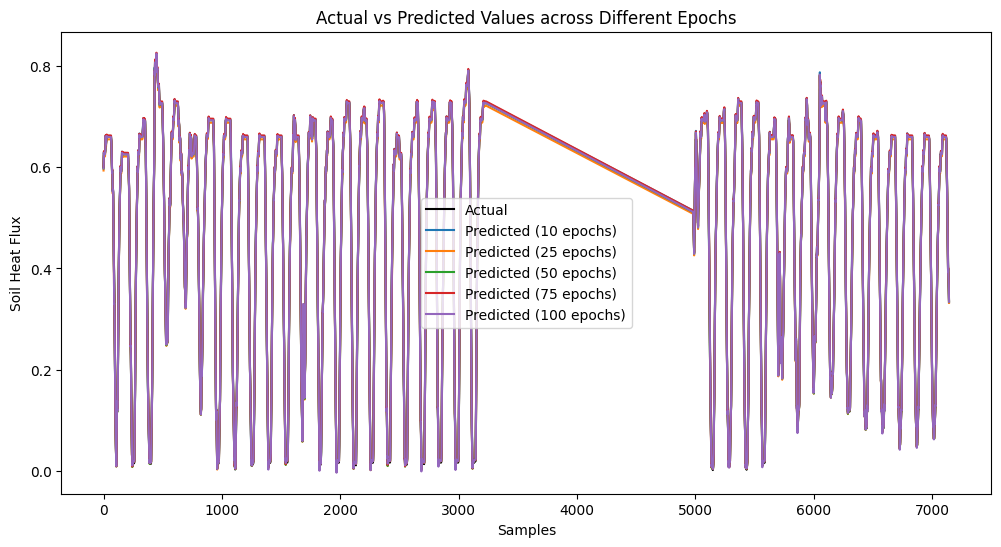

In [16]:
# Function to train and evaluate the model for different epochs and plot in a single graph
def train_and_evaluate_combined(epochs_list, X_train, y_train, X_test, y_test):
    results = {}
    predictions_dict = {}

    for epochs in epochs_list:
        print(f"\nTraining model for {epochs} epochs...\n")
        
        # Define the model
        model = Sequential([
            Input(shape=(sequence_length, 1)),
            LSTM(64, return_sequences=True),
            LSTM(64, return_sequences=False),
            Dense(25),
            Dense(1)
        ])
        
        model.compile(optimizer='adam', loss='mean_squared_error')
        
        # Train the model
        model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test), verbose=0)
        
        # Make predictions
        predictions = model.predict(X_test)
        predictions_dict[epochs] = predictions
        
        # Calculate metrics
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions) * 100  # R² in percentage
        
        # Store the results
        results[epochs] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R^2 %': r2}
        
        # Display metrics
        print(f"Results for {epochs} epochs:")
        print(f"MSE: {mse}")
        print(f"RMSE: {rmse}")
        print(f"MAE: {mae}")
        print(f"R^2: {r2}%\n")

    # Plotting actual values and predictions from all epochs
    plt.figure(figsize=(12, 6))
    plt.plot(y_test, label='Actual', color='black', linewidth=1.5)
    
    # Plot predictions for each epoch count
    for epochs, preds in predictions_dict.items():
        plt.plot(preds, label=f'Predicted ({epochs} epochs)')
    
    plt.title('Actual vs Predicted Values across Different Epochs')
    plt.xlabel('Samples')
    plt.ylabel('Soil Heat Flux')
    plt.legend()
    plt.show()
    
    return results

# List of epochs to train on
epochs_list = [10, 25, 50, 75, 100]

# Assuming X_train, y_train, X_test, y_test are already defined
results = train_and_evaluate_combined(epochs_list, X_train, y_train, X_test, y_test)


Training model for 10 epochs...

224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Results for 10 epochs:
MSE: 1.5988238705797055e-05
RMSE: 0.003998529567953332
MAE: 0.003171125441785523
R^2: 99.96735471982436%



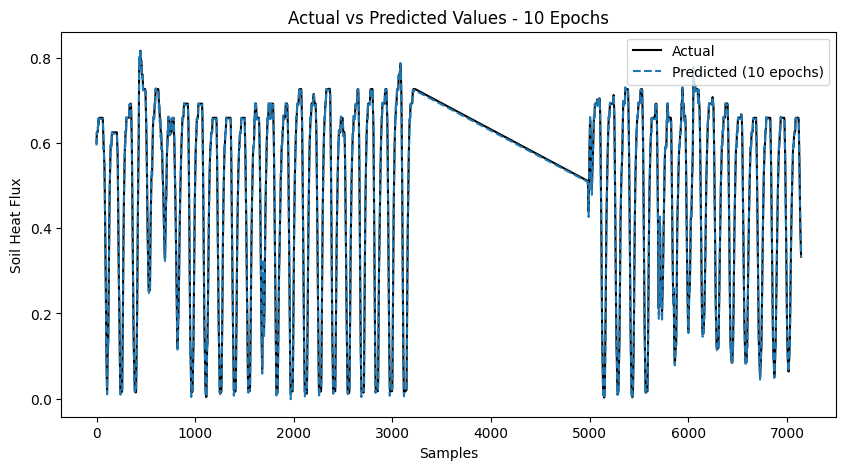


Training model for 25 epochs...

224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Results for 25 epochs:
MSE: 1.1803761783707824e-05
RMSE: 0.0034356603126193697
MAE: 0.001849865133020686
R^2: 99.9758987141957%



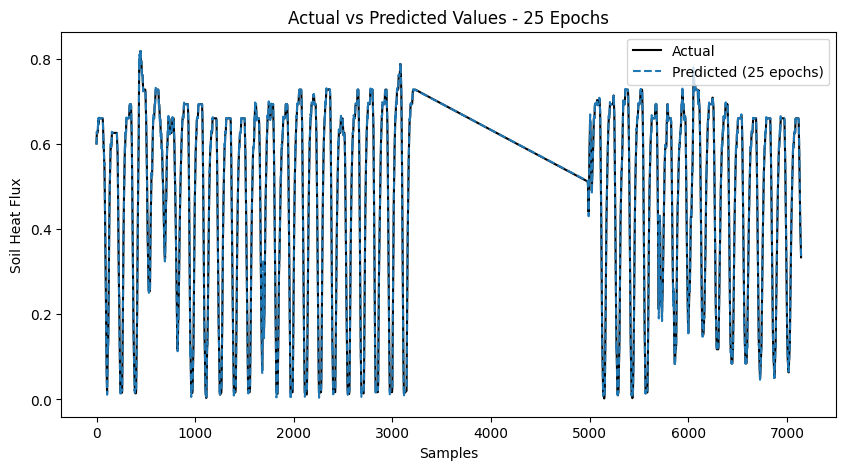


Training model for 50 epochs...

224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Results for 50 epochs:
MSE: 1.550979006360956e-05
RMSE: 0.003938247080061072
MAE: 0.0029358198189371274
R^2: 99.9683316310565%



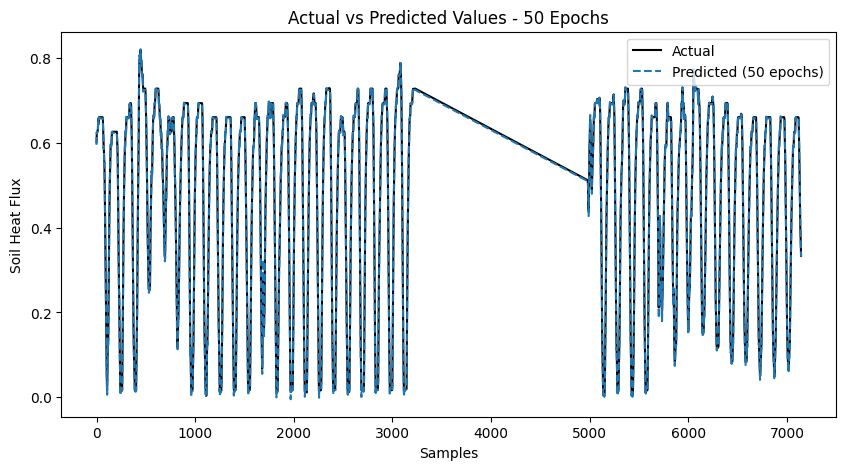


Training model for 75 epochs...

224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Results for 75 epochs:
MSE: 1.679449584428188e-05
RMSE: 0.004098108813133428
MAE: 0.002914459243199273
R^2: 99.96570847906801%



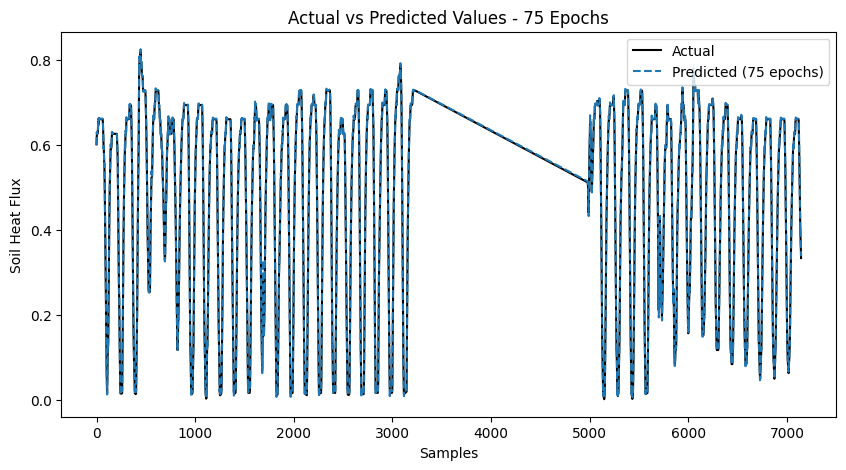


Training model for 100 epochs...

224/224 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Results for 100 epochs:
MSE: 1.0508398660448466e-05
RMSE: 0.0032416660316029575
MAE: 0.0018936530884326533
R^2: 99.97854362667582%



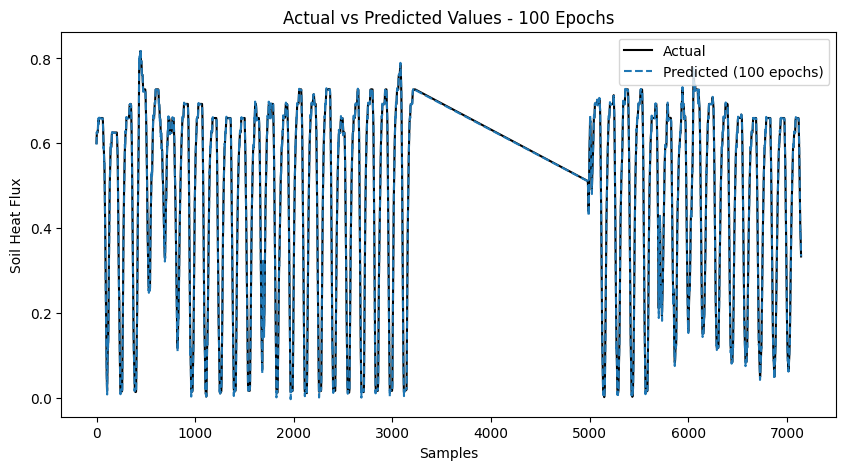

In [17]:
# Function to train and evaluate the model for different epochs and plot each separately
def train_and_evaluate_separately(epochs_list, X_train, y_train, X_test, y_test):
    results = {}

    for epochs in epochs_list:
        print(f"\nTraining model for {epochs} epochs...\n")
        
        # Define the model
        model = Sequential([
            Input(shape=(sequence_length, 1)),
            LSTM(64, return_sequences=True),
            LSTM(64, return_sequences=False),
            Dense(25),
            Dense(1)
        ])
        
        model.compile(optimizer='adam', loss='mean_squared_error')
        
        # Train the model
        model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test), verbose=0)
        
        # Make predictions
        predictions = model.predict(X_test)
        
        # Calculate metrics
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, predictions)
        r2 = r2_score(y_test, predictions) * 100  # R² in percentage
        
        # Store the results
        results[epochs] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae, 'R^2 %': r2}
        
        # Display metrics
        print(f"Results for {epochs} epochs:")
        print(f"MSE: {mse}")
        print(f"RMSE: {rmse}")
        print(f"MAE: {mae}")
        print(f"R^2: {r2}%\n")
        
        # Plotting actual vs predicted values for current epoch
        plt.figure(figsize=(10, 5))
        plt.plot(y_test, label='Actual', color='black', linewidth=1.5)
        plt.plot(predictions, label=f'Predicted ({epochs} epochs)', linestyle='--')
        plt.title(f'Actual vs Predicted Values - {epochs} Epochs')
        plt.xlabel('Samples')
        plt.ylabel('Soil Heat Flux')
        plt.legend()
        plt.show()
    
    return results

# List of epochs to train on
epochs_list = [10, 25, 50, 75, 100]

# Assuming X_train, y_train, X_test, y_test are already defined
results = train_and_evaluate_separately(epochs_list, X_train, y_train, X_test, y_test)

In [1]:
!pip install tensorflow numpy pandas matplotlib keras-tcn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 8.8 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.3.0
    Uninstalling typeguard-4.3.0:
      Successfully uninstalled typeguard-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.9.0 requires scipy<1.14,>=1.4.1, but you have scipy 1.14.0 which is incompatible.
ydata-profiling 4.9.0 requires typeguard<5,>=3, but you have typeguard 2.13.3 which is incompatible.


In [2]:
!pip install scipy==1.13.3 typeguard==4.0.0

ERROR: Ignored the following yanked versions: 1.11.0, 1.14.0rc1
ERROR: Ignored the following versions that require a different python version: 1.6.2 Requires-Python >=3.7,<3.10; 1.6.3 Requires-Python >=3.7,<3.10; 1.7.0 Requires-Python >=3.7,<3.10; 1.7.1 Requires-Python >=3.7,<3.10
ERROR: Could not find a version that satisfies the requirement scipy==1.13.3 (from versions: 0.8.0, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.13.0, 0.13.1, 0.13.2, 0.13.3, 0.14.0, 0.14.1, 0.15.0, 0.15.1, 0.16.0, 0.16.1, 0.17.0, 0.17.1, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 1.0.0, 1.0.1, 1.1.0, 1.2.0, 1.2.1, 1.2.2, 1.2.3, 1.3.0, 1.3.1, 1.3.2, 1.3.3, 1.4.0, 1.4.1, 1.5.0, 1.5.1, 1.5.2, 1.5.3, 1.5.4, 1.6.0, 1.6.1, 1.7.2, 1.7.3, 1.8.0rc1, 1.8.0rc2, 1.8.0rc3, 1.8.0rc4, 1.8.0, 1.8.1, 1.9.0rc1, 1.9.0rc2, 1.9.0rc3, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0rc1, 1.10.0rc2, 1.10.0, 1.10.1, 1.11.0rc1, 1.11.0rc2, 1.11.1, 1.11.2, 1.11.3, 1.11.4, 1.12.0rc1, 1.12.0rc2, 1.12.0, 1.13.0rc1, 1.13.0, 1.13.1, 1.14.0rc2, 1.14.0, 1.14.1)
E

In [3]:
!pip install ydata-profiling --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 8.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 42.6 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: typeguard
    Found existing installation: typeguard 2.13.3
    Uninstalling typeguard-2.13.3:
      Successfully uninstalled typeguard-2.13.3
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.0
    Uninstalling scipy-1.14.0:
      Successfully uninstalled scipy-1.14.0
  Attempting uninstall: ydata-profiling
    Found existing installation: ydata-profiling 4.9.0
    Uninstalling ydata-profiling-4.9.0:
      Successfully uninstalled ydata-profiling-4.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cuml 24.8.0 requires cupy-cuda11x>=12.0.0, which is not install

In [4]:
import shapely
import scipy
import typeguard
import packaging

print("shapely version:", shapely.__version__)
print("scipy version:", scipy.__version__)
print("typeguard version:", typeguard.__version__)
print("packaging version:", packaging.__version__)

shapely version: 1.8.5.post1
scipy version: 1.13.1


AttributeError: module 'typeguard' has no attribute '__version__'

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as tf
from tcn import TCN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [11]:
# Load the data
df_train = pd.read_csv('/kaggle/input/soil-flux/train_transformed_10.csv')
df_val = pd.read_csv('/kaggle/input/soil-flux/val_transformed_10.csv')
df_test = pd.read_csv('/kaggle/input/soil-flux/test_transformed_10.csv')

# Set the 'DateTime' column as index if it exists
if 'DateTime' in df_train.columns:
    df_train['DateTime'] = pd.to_datetime(df_train['DateTime'])
    df_train.set_index('DateTime', inplace=True)
if 'DateTime' in df_val.columns:
    df_val['DateTime'] = pd.to_datetime(df_val['DateTime'])
    df_val.set_index('DateTime', inplace=True)
if 'DateTime' in df_test.columns:
    df_test['DateTime'] = pd.to_datetime(df_test['DateTime'])
    df_test.set_index('DateTime', inplace=True)

# Extract features and target
X_train = df_train.drop(columns=['SoilHeatFlux_DiffVolt1']).values
y_train = df_train['SoilHeatFlux_DiffVolt1'].values
X_val = df_val.drop(columns=['SoilHeatFlux_DiffVolt1']).values
y_val = df_val['SoilHeatFlux_DiffVolt1'].values
X_test = df_test.drop(columns=['SoilHeatFlux_DiffVolt1']).values
y_test = df_test['SoilHeatFlux_DiffVolt1'].values

# Scale features between 0 and 1
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Reshape the data for TCN (input_shape should be (n_samples, timesteps, n_features))
X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_val_scaled = X_val_scaled.reshape(X_val_scaled.shape[0], 1, X_val_scaled.shape[1])
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

ValueError: could not convert string to float: '2018-07-02 23:30:00'